In [198]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#from sklearn.metrics import confusion_matrix

In [199]:
def confusion_calcs(confusion_matrix):
    temp_arr = confusion_matrix
    tn = temp_arr[0]
    fp = temp_arr[1]
    fn = temp_arr[2]
    tp = temp_arr[3]
    sensitivity = tp / (tp + fn)
    recall = sensitivity
    specificity = tn / (tn + fp)
    precision = tp / (tp + fp)
    accuracy = (tp+tn) / (tp+tn+fn+fp)
    f1 = 2*precision*recall/(precision+recall)
    return [accuracy, sensitivity, specificity, precision, f1]

In [200]:
main1_eval = []
main2_eval = []
main1_after = []
main2_after = []

In [201]:
xgboost_eval = confusion_calcs([23073, 1670, 1680, 18545])
main1_eval.append(xgboost_eval)
xgboost_after = confusion_calcs([23124, 1619, 1670, 18555])
main1_after.append(xgboost_after)

In [202]:
catboost_eval = confusion_calcs([23166, 1577, 1692, 18533])
main1_eval.append(catboost_eval)
catboost_after = confusion_calcs([23080, 1663, 1757, 18468])
main1_after.append(catboost_after)

In [203]:
lightgbm_eval = confusion_calcs([23104, 1639, 1720, 18505])
main1_eval.append(lightgbm_eval)
lightgbm_after = confusion_calcs([23106, 1637, 1709, 18516])
main1_after.append(lightgbm_after)

In [204]:
adaboost_eval = confusion_calcs([22760, 1983, 1706, 18519])
main1_eval.append(adaboost_eval)
adaboost_after = confusion_calcs([22768, 1975, 1711, 18514])
main1_after.append(adaboost_after)

In [205]:
gboost_eval = confusion_calcs([23139, 1604, 1738, 18487])
main1_eval.append(gboost_eval)
#gboost_after = confusion_calcs()
#main1_after.append(gboost_after)
#skip for now

In [206]:
decisiontree_eval = confusion_calcs([22397, 2346, 1908, 18317])
main1_eval.append(decisiontree_eval)
decisiontree_after = confusion_calcs([22670, 2073, 1762, 18463])
main1_after.append(decisiontree_after)

In [207]:
rf_eval = confusion_calcs([22476, 2267, 1651, 18574])
main1_eval.append(rf_eval)
rf_after = confusion_calcs([23027, 1716, 1600, 18625])
main1_after.append(rf_after)

In [208]:
bagging_eval = confusion_calcs([22771, 1972, 1738, 18487])
main1_eval.append(bagging_eval)
bagging_after = confusion_calcs([23064, 1679, 1637, 18588])
main1_after.append(bagging_after)

In [209]:
knn_eval = confusion_calcs([22634,  2109, 2032, 18193])
main2_eval.append(knn_eval)
knn_after = confusion_calcs([22873, 1870, 1789, 18436])
main2_after.append(knn_after)

In [210]:
lda_eval = confusion_calcs([23025, 1718, 1956, 18269])
main2_eval.append(lda_eval)
#not tuned

In [211]:
qda_eval = confusion_calcs([22462, 2281, 2327, 17898])
main2_eval.append(qda_eval)
#not tuned

In [212]:
logreg_eval = confusion_calcs([23118, 1625,1901, 18324])
main2_eval.append(logreg_eval)
#not tuned

In [213]:
svc_eval = confusion_calcs([22965, 1778,1771, 18454])
main2_eval.append(svc_eval)
svc_after = confusion_calcs([22883, 1860, 1802, 18423])
main2_after.append(svc_after)

In [214]:
svm_eval = confusion_calcs([22277, 2466, 1893, 18332])
main2_eval.append(svm_eval)
svm_after = confusion_calcs([22321, 2422, 2421, 17804])
main2_after.append(svm_after)

In [223]:
main1_after[0]

[0.9268590998043053,
 0.9174289245982694,
 0.934567352382492,
 0.9197481907405571,
 0.918587093739944]

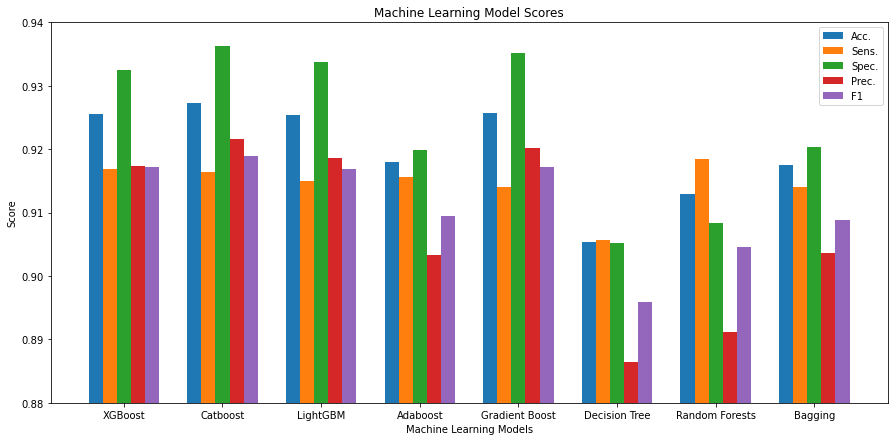

In [216]:
columns = ['XGBoost', 'Catboost','LightGBM', 'Adaboost', 'Gradient Boost','Decision Tree', 'Random Forests','Bagging']
fig, axs = plt.subplots(figsize=(15,7))
axs.set_ylim(0.88, 0.94)
X_axis = np.arange(0, 5.6, 0.7)
acc_list = []
sens_list = []
spec_list = []
prec_list = []
f1_list = []

for model_list in main1_eval:
    acc_list.append(model_list[0])
    sens_list.append(model_list[1])
    spec_list.append(model_list[2])
    prec_list.append(model_list[3])
    f1_list.append(model_list[4])
# for model_list in main2_eval:
#     acc_list.append(model_list[0])
#     sens_list.append(model_list[1])
#     spec_list.append(model_list[2])
#     prec_list.append(model_list[3])
#     f1_list.append(model_list[4])

plt.bar(X_axis - 0.2, acc_list, 0.1, label = 'Acc.')
plt.bar(X_axis - 0.1, sens_list, 0.1, label = 'Sens.')
plt.bar(X_axis, spec_list, 0.1, label = 'Spec.')
plt.bar(X_axis + 0.1, prec_list, 0.1, label = 'Prec.')
plt.bar(X_axis + 0.2, f1_list, 0.1, label = 'F1')

plt.xticks(X_axis, columns)
plt.xlabel("Machine Learning Models")
plt.ylabel("Score")
plt.title("Machine Learning Model Scores")
plt.legend(loc='upper right')
plt.show()

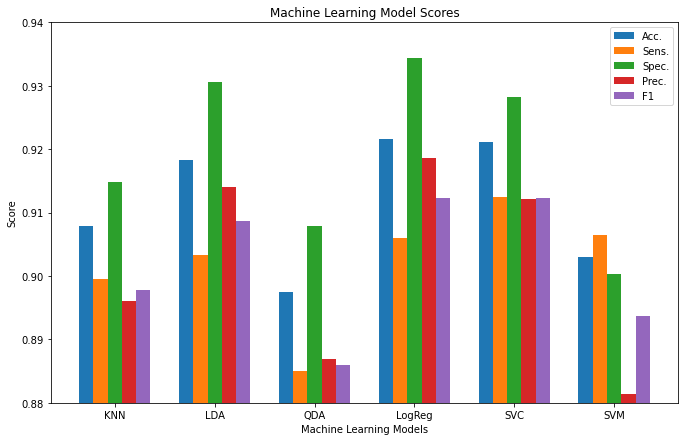

In [217]:
columns = ['KNN', 'LDA', 'QDA', 'LogReg', 'SVC', 'SVM']

fig, axs = plt.subplots(figsize=(11.25,7))
axs.set_ylim(0.88, 0.94)
X_axis = np.arange(0, 4.1, 0.7)
acc_list = []
sens_list = []
spec_list = []
prec_list = []
f1_list = []

for model_list in main2_eval:
    acc_list.append(model_list[0])
    sens_list.append(model_list[1])
    spec_list.append(model_list[2])
    prec_list.append(model_list[3])
    f1_list.append(model_list[4])

plt.bar(X_axis - 0.2, acc_list, 0.1, label = 'Acc.')
plt.bar(X_axis - 0.1, sens_list, 0.1, label = 'Sens.')
plt.bar(X_axis, spec_list, 0.1, label = 'Spec.')
plt.bar(X_axis + 0.1, prec_list, 0.1, label = 'Prec.')
plt.bar(X_axis + 0.2, f1_list, 0.1, label = 'F1')

plt.xticks(X_axis, columns)
plt.xlabel("Machine Learning Models")
plt.ylabel("Score")
plt.title("Machine Learning Model Scores")
plt.legend(loc='upper right')
plt.show()

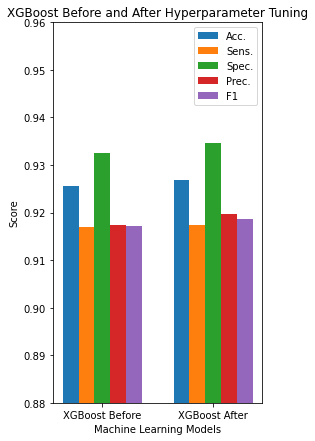

In [218]:
#XGBoost
columns = ['XGBoost Before', 'XGBoost After']
fig, axs = plt.subplots(figsize=(3.75,7))
axs.set_ylim(0.88, 0.96)
X_axis = np.arange(0, 1.4, 0.7)
acc_list = []
sens_list = []
spec_list = []
prec_list = []
f1_list = []


acc_list.append(main1_eval[0][0])
sens_list.append(main1_eval[0][1])
spec_list.append(main1_eval[0][2])
prec_list.append(main1_eval[0][3])
f1_list.append(main1_eval[0][4])

acc_list.append(main1_after[0][0])
sens_list.append(main1_after[0][1])
spec_list.append(main1_after[0][2])
prec_list.append(main1_after[0][3])
f1_list.append(main1_after[0][4])
# for model_list in main2_eval:
#     acc_list.append(model_list[0])
#     sens_list.append(model_list[1])
#     spec_list.append(model_list[2])
#     prec_list.append(model_list[3])
#     f1_list.append(model_list[4])

plt.bar(X_axis - 0.2, acc_list, 0.1, label = 'Acc.')
plt.bar(X_axis - 0.1, sens_list, 0.1, label = 'Sens.')
plt.bar(X_axis, spec_list, 0.1, label = 'Spec.')
plt.bar(X_axis + 0.1, prec_list, 0.1, label = 'Prec.')
plt.bar(X_axis + 0.2, f1_list, 0.1, label = 'F1')

plt.xticks(X_axis, columns)
plt.xlabel("Machine Learning Models")
plt.ylabel("Score")
plt.title("XGBoost Before and After Hyperparameter Tuning")
plt.legend(loc='upper right')
plt.show()

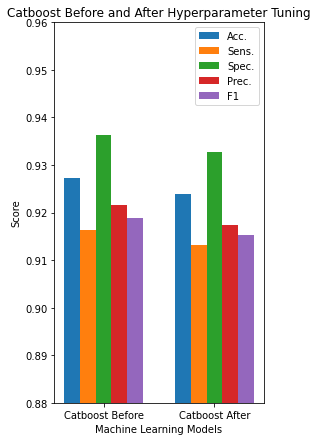

In [225]:
#XGBoost
columns = ['Catboost Before', 'Catboost After']
fig, axs = plt.subplots(figsize=(3.75,7))
axs.set_ylim(0.88, 0.96)
X_axis = np.arange(0, 1.4, 0.7)
acc_list = []
sens_list = []
spec_list = []
prec_list = []
f1_list = []


acc_list.append(main1_eval[1][0])
sens_list.append(main1_eval[1][1])
spec_list.append(main1_eval[1][2])
prec_list.append(main1_eval[1][3])
f1_list.append(main1_eval[1][4])

acc_list.append(main1_after[1][0])
sens_list.append(main1_after[1][1])
spec_list.append(main1_after[1][2])
prec_list.append(main1_after[1][3])
f1_list.append(main1_after[1][4])

plt.bar(X_axis - 0.2, acc_list, 0.1, label = 'Acc.')
plt.bar(X_axis - 0.1, sens_list, 0.1, label = 'Sens.')
plt.bar(X_axis, spec_list, 0.1, label = 'Spec.')
plt.bar(X_axis + 0.1, prec_list, 0.1, label = 'Prec.')
plt.bar(X_axis + 0.2, f1_list, 0.1, label = 'F1')

plt.xticks(X_axis, columns)
plt.xlabel("Machine Learning Models")
plt.ylabel("Score")
plt.title("Catboost Before and After Hyperparameter Tuning")
plt.legend(loc='upper right')
plt.show()

In [227]:
print(main1_eval[1], main1_after[1])

[0.9273038605230386, 0.9163411619283065, 0.9362648021662693, 0.9215813028344108, 0.9189537622412296] [0.923945917096602, 0.9131273176761434, 0.9327890716566302, 0.9173910883711689, 0.9152542372881356]


In [ ]:
# Random Forest before:
# white_check_mark
# eyes
# raised_hands
# React
# Reply

# 10:37
# ---Run time is 2584.099302100003 seconds ---

# Accuracy of each fold: 
#  [0.9038901601830663, 0.9521298174442191, 0.9943324937027708, 0.8830935251798561, 0.9968652037617555, 0.9448275862068966, 0.8748248482017749, 0.9965963240299524, 0.9432730923694779, 0.9487320837927232, 0.9832123411978222, 0.9849246231155779, 0.7360544217687075, 0.9974522292993631, 0.5054121565362198, 0.969428444838281, 0.9828649760109665, 0.9878822850548182, 0.6745562130177515, 0.9763606377130292, 0.9948674080410608, 0.9868173258003766, 0.9940803382663848]

# Avg accuracy : 
# 0.9222816754579501

# Std of accuracy : 
# 0.12046431828512935
# 10:38
# [[22476  2267]
#  [ 1651 18574]]

In [ ]:
# Random Forest after:
# white_check_mark
# eyes
# raised_hands
# React
# Reply

# 10:38
# ---Run time is 119.9745147000067 seconds ---

# Accuracy of each fold: 
#  [0.9084668192219679, 0.9537525354969574, 0.9955919395465995, 0.9232613908872902, 0.9979101358411703, 0.9521298174442191, 0.8243811303129379, 0.9972770592239619, 0.9427710843373494, 0.9674751929437707, 0.9836660617059891, 0.9913854989231874, 0.8117913832199547, 0.967515923566879, 0.593255620316403, 0.9893664155959238, 0.9869773817683345, 0.9861511829197923, 0.7489433643279797, 0.9703133589884552, 0.9948674080410608, 0.9962335216572504, 0.9966173361522199]

# Avg accuracy : 
# 0.9339174592365065

# Std of accuracy : 
# 0.09783789438795784
# New
# 10:38
# [[23027  1716]
#  [ 1600 18625]]

In [ ]:
# XGBoost before:
# white_check_mark
# eyes
# raised_hands
# React
# Reply

# 10:48
# roc_auc_score 0.9999020242718537
# ---Run time is 28.772993899998255 seconds ---

# Accuracy of each fold: 
#  [0.914187643020595, 0.954158215010142, 0.9962216624685138, 0.935251798561151, 0.9968652037617555, 0.9525354969574037, 0.7888836992059786, 0.998638529611981, 0.9392570281124498, 0.9685777287761852, 0.9823049001814882, 0.990667623833453, 0.8249433106575964, 0.9535031847133758, 0.5961698584512906, 0.9906956136464333, 0.9910897875257025, 0.9878822850548182, 0.742603550295858, 0.9692138537658054, 0.9961505560307955, 0.9968612680477087, 0.9987315010570824]

# Avg accuracy : 
# 0.9332780129890246

# Std of accuracy : 
# 0.09926188579723327
# 10:49
# [[23073  1670]
#  [ 1680 18545]]

In [1]:
#XGBOOST After
# ---Run time is 47.04468490020372 seconds ---

# Accuracy of each fold: 
#  [0.9187643020594966, 0.9549695740365112, 0.9962216624685138, 0.9322541966426858, 0.9973876698014629, 0.9574036511156186, 0.7706679121905652, 0.9979577944179714, 0.9407630522088354, 0.9658213891951488, 0.9832123411978222, 0.9899497487437185, 0.8303854875283446, 0.954140127388535, 0.6219816819317235, 0.9880372175454143, 0.9904043865661412, 0.9838430467397576, 0.7616229923922232, 0.959868059373282, 0.9965782720273738, 0.9943502824858758, 0.9978858350951374]

# Avg accuracy : 
# 0.9341074210066155

# Std of accuracy : 
# 0.09454601994721872

In [ ]:
# LightGBM Before:
# white_check_mark
# eyes
# raised_hands
# React
# Reply

# 1:11
# ---Run time is 5.280834200006211 seconds ---

# Accuracy of each fold: 
#  [0.914187643020595, 0.9525354969574037, 0.9962216624685138, 0.9292565947242206, 0.9979101358411703, 0.954158215010142, 0.7860812704343765, 0.9979577944179714, 0.9372489959839357, 0.9691289966923925, 0.9832123411978222, 0.990667623833453, 0.8054421768707483, 0.9598726114649682, 0.577435470441299, 0.9893664155959238, 0.9917751884852639, 0.9861511829197923, 0.7502113271344041, 0.9719626168224299, 0.995295124037639, 0.9962335216572504, 0.9987315010570824]

# Avg accuracy : 
# 0.9317845176986433

# Std of accuracy : 
# 0.10265051679211624
# 1:11
# [[23043  1700]
#  [ 1729 18496]]

In [ ]:
# ---Run time is 5.75461859999632 seconds ---

# Accuracy of each fold: 
#  [0.9164759725400458, 0.9545638945233266, 0.9962216624685138, 0.9316546762589928, 0.9973876698014629, 0.9582150101419878, 0.7580569827183559, 0.998638529611981, 0.9397590361445783, 0.9707828004410143, 0.9823049001814882, 0.9913854989231874, 0.8303854875283446, 0.956687898089172, 0.601165695253955, 0.9884802835622508, 0.9890335846470185, 0.9878822850548182, 0.7540152155536771, 0.9708631115997801, 0.9965782720273738, 0.9968612680477087, 0.9978858350951374]

# Avg accuracy : 
# 0.9332732856614858

# Std of accuracy : 
# 0.09955941484364123
# white_check_mark
# eyes
# raised_hands
# React
# Reply

# 1:13
# [[23106  1637]
#  [ 1709 18516]]

In [ ]:
# ---Run time is 8.892542999994475 seconds ---

# Accuracy of each fold: 
#  [0.9107551487414187, 0.9557809330628804, 0.9962216624685138, 0.9370503597122302, 0.9973876698014629, 0.9484787018255578, 0.8243811303129379, 0.9972770592239619, 0.9437751004016064, 0.9707828004410143, 0.9841197822141561, 0.9885139985642498, 0.7868480725623582, 0.9707006369426752, 0.5203996669442131, 0.9915817456801064, 0.9910897875257025, 0.9861511829197923, 0.7430262045646661, 0.9747113798790544, 0.9965782720273738, 0.9968612680477087, 0.9970401691331924]

# Avg accuracy : 
# 0.9308483796955145

# Std of accuracy : 
# 0.11135096999367239
# white_check_mark
# eyes
# raised_hands
# React
# Reply

# New
# 7:40
# [[23166  1577]
#  [ 1692 18533]]

In [2]:
#Catboosting After
# ---Run time is 20.29537530010566 seconds ---
# [[23080  1663]
#  [ 1757 18468]]
# Accuracy of each fold: 
#  [0.9124713958810069, 0.9525354969574037, 0.9974811083123426, 0.9262589928057554, 0.9979101358411703, 0.9525354969574037, 0.8155067725361981, 0.9972770592239619, 0.9397590361445783, 0.9707828004410143, 0.9832123411978222, 0.990667623833453, 0.8022675736961451, 0.967515923566879, 0.5420482930890924, 0.9902525476295968, 0.9910897875257025, 0.9849971148297749, 0.760777683854607, 0.9741616272677295, 0.9970059880239521, 0.9968612680477087, 0.9970401691331924]

# Avg accuracy : 
# 0.9321920102954995

# Std of accuracy : 
# 0.10610803049760552

In [3]:
# Bagging Before:
# New
# 1:44
# ---Run time is 1262.5597275000036 seconds ---

# Accuracy of each fold: 
#  [0.9061784897025171, 0.9456389452332657, 0.9955919395465995, 0.908273381294964, 0.9952978056426333, 0.9440162271805274, 0.8397944885567492, 0.9972770592239619, 0.9332329317269076, 0.958103638368247, 0.9818511796733213, 0.9849246231155779, 0.782312925170068, 0.9738853503184713, 0.5578684429641965, 0.973859105006646, 0.9835503769705277, 0.9930755914598961, 0.7071005917159763, 0.9763606377130292, 0.9914456800684346, 0.9899560577526679, 0.9839323467230444]

# Avg accuracy : 
# 0.9262403397881838

# Std of accuracy : 
# 0.10672839222741957
# 1:44
# [[22771  1972]
#  [ 1738 18487]]

In [4]:
# Bagging After:
# 1:42
# ---Run time is 693.3505415000109 seconds ---

# Accuracy of each fold: 
#  [0.9130434782608695, 0.9496957403651115, 0.9955919395465995, 0.9238609112709832, 0.9973876698014629, 0.9545638945233266, 0.7986921999065857, 0.9979577944179714, 0.9422690763052208, 0.9685777287761852, 0.9813974591651543, 0.9885139985642498, 0.8331065759637188, 0.9503184713375796, 0.6194837635303914, 0.9871510855117412, 0.9869773817683345, 0.9873052510098096, 0.7417582417582418, 0.9708631115997801, 0.9918733960650128, 0.997489014438167, 0.9961945031712474]

# Avg accuracy : 
# 0.9336553342199018

# Std of accuracy : 
# 0.09447902543178308
# white_check_mark
# eyes
# raised_hands
# React
# Reply

# 1:42
# [[23064  1679]
#  [ 1637 18588]]